In [1]:
import pandas as pd

data = pd.read_csv("referenceVectors.txt", sep=';', skipfooter=8)
data.head()

<ipython-input-1-feebb529c285>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  data = pd.read_csv("referenceVectors.txt", sep=';', skipfooter=8)


Pop 2019  GDP 2019  ICG 2019  ECI 2018
0  0.523679  0.875028  0.637358  0.102579
1  0.859989  0.728921  0.632225  0.125800
2  0.974844  0.671544  0.629838  0.135529
3  0.976411  0.565665  0.619439  0.165711
4  0.941650  0.229029  0.582843  0.272289

In [2]:
data.describe()

Pop 2019    GDP 2019    ICG 2019    ECI 2018
count  392.000000  392.000000  392.000000  392.000000
mean     0.059359    0.050189    0.610006    0.416997
std      0.146850    0.137094    0.158247    0.241073
min      0.001967    0.001053    0.100114    0.015100
25%      0.008620    0.004718    0.498923    0.208460
50%      0.017286    0.012025    0.605227    0.396608
75%      0.043742    0.026801    0.727248    0.607744
max      0.976411    0.985172    0.977369    0.972204

# Davies-Bouldin Score

**Values closer to zero indicate a better partition**

User Guide: https://scikit-learn.org/stable/modules/clustering.html#davies-bouldin-index

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.davies_bouldin_score.html

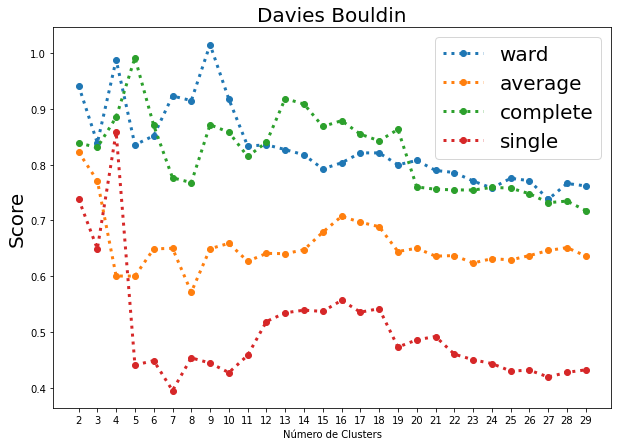

In [3]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
import pandas as pd

metodos = ['ward', 'average', 'complete']
dfT = pd.DataFrame(index = range(2,30), columns=metodos)

X=data

for linkage in metodos:
  #print(linkage)
  for k in range(2,30):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=k)
    clustering.fit(X)
    score = davies_bouldin_score(X, clustering.labels_)
    dfT.at[k,linkage] = score
    #print(k, score)


ax1 = dfT.plot.line(figsize=(15,10), xticks=dfT.index, style='o:', fontsize=10, linewidth=3)
ax1.set_title('Davies Bouldin', fontsize=20)
ax1.set_xlabel('Número de Clusters', fontsize=10)
ax1.set_ylabel('Score', fontsize=20)
ax1.legend(fontsize=20)
#dfT

## Silhouette Coefficient

**The best value is 1 and the worst value is -1.** Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

User Guide: https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient



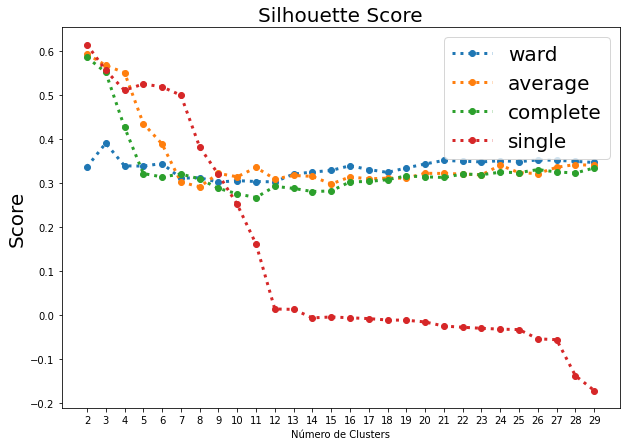

In [4]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import pandas as pd

metodos = ['ward', 'average', 'complete']
dfT = pd.DataFrame(index = range(2,30), columns=metodos)

X=data

for linkage in metodos:
  #print(linkage)
  for k in range(2,30):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=k)
    clustering.fit(X)
    score = silhouette_score(X, clustering.labels_)
    dfT.at[k,linkage] = score
    #print(k, score)


ax1 = dfT.plot.line(figsize=(15,10), xticks=dfT.index, style='o:', fontsize=10, linewidth=3)
ax1.set_title('Silhouette Score', fontsize=20)
ax1.set_xlabel('Número de Clusters', fontsize=10)
ax1.set_ylabel('Score', fontsize=20)
ax1.legend(fontsize=20)
#dfT

# Calinski-Harabasz

**The score is higher when clusters are dense and well separated**, which relates to a standard concept of a cluster.

User guide:https://scikit-learn.org/stable/modules/clustering.html#calinski-harabasz-index



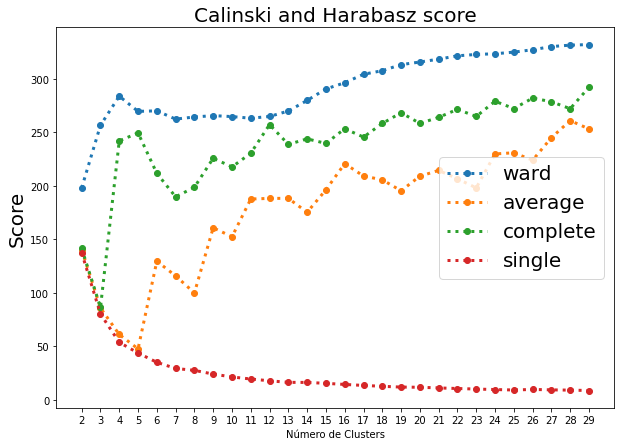

In [5]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import calinski_harabasz_score
import pandas as pd

metodos = ['ward', 'average', 'complete']
dfT = pd.DataFrame(index = range(2,30), columns=metodos)

X=data

for linkage in metodos:
  #print(linkage)
  for k in range(2,30):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=k)
    clustering.fit(X)
    score = calinski_harabasz_score(X, clustering.labels_)
    dfT.at[k,linkage] = score
    #print(k, score)


ax1 = dfT.plot.line(figsize=(15,10), xticks=dfT.index, style='o:', fontsize=10, linewidth=3)
ax1.set_title('Calinski and Harabasz score', fontsize=20)
ax1.set_xlabel('Número de Clusters', fontsize=10)
ax1.set_ylabel('Score', fontsize=20)
ax1.legend(fontsize=20)
#dfT